In [ ]:
#Split location-only results by MA and cone angle.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import glob

from XMA_finder import XMA_finder
from histo_plot import histo_plot
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

#import modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
import matplotlib
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM

In [ ]:
#open OMNI *average* CSVs
list_all = []

path = "/Users/apx059/Documents/Location_Only_Checks/OMNI Averages/**"

for path in glob.glob(path, recursive=True):
    list_all.append(path)
    
#list with only files, not folders
om_csvs = []

for element in list_all:
    if '.csv' in element:
        om_csvs.append(element)
        
om_dfs = []

for element in om_csvs:
    om = pd.read_csv(element)
    om_dfs.append(om)
    
omni_all = pd.concat(om_dfs)
omni_all['datetime'] = pd.to_datetime(omni_all['datetime'])

omni_all = omni_all.set_index('datetime')

for element in om_dfs:
    element['datetime'] = pd.to_datetime(element['datetime'])
    element = element.set_index('datetime', inplace = True)

XMA_all = XMA_finder(omni_all)

In [ ]:
##load Cluster CSVs

list_all = []

path = "/Users/apx059/Documents/23YrLocApocrita/MAandCA_CSVs/**"

for path in glob.glob(path, recursive=True):
    list_all.append(path)
    
#list with only files, not folders
cl_file_list = []

for element in list_all:
    if '.csv' in element:
        cl_file_list.append(element)

cl_dfs = []

for file in cl_file_list:
    df = pd.read_csv(file,encoding='utf-8')
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace = True)
    cl_dfs.append(df)

In [ ]:
#make new dataframes split by 1. cone angle and 2. MA
cl_all = pd.concat(cl_dfs)

df_radial = cl_all.loc[(cl_all['cone angle'] < 30) & (cl_all['GIPM X (RE)'].notnull())]
df_spiral = cl_all.loc[(cl_all['cone angle'] > 30) & (cl_all['cone angle'] < 60) & (cl_all['GIPM X (RE)'].notnull())]
df_perpendicular = cl_all.loc[(cl_all['cone angle'] > 60) & (cl_all['GIPM X (RE)'].notnull())]

#now break up by MA. MA ranges <5, 5-8, 8-11, 11-14, 14-18, 18-22, >22

#radial
df_rad_less5 = df_radial.loc[(df_radial['MA'] < 5)]
df_rad_5_8 = df_radial.loc[((df_radial['MA'] >= 5) & df_radial['MA'] < 8)]
df_rad_8_11 = df_radial.loc[(df_radial['MA'] >= 8) & (df_radial['MA'] < 11)]
df_rad_11_14 = df_radial.loc[(df_radial['MA'] >= 11) & (df_radial['MA'] < 14)]
df_rad_14_18 = df_radial.loc[(df_radial['MA'] >= 14) & (df_radial['MA'] < 18)]
df_rad_18_22 = df_radial.loc[(df_radial['MA'] >= 18) & (df_radial['MA'] < 22)]
df_rad_22more = df_radial.loc[(df_radial['MA'] >= 22)]

#spiral 

df_spir_less5 = df_spiral.loc[(df_spiral['MA'] < 5)]
df_spir_5_8 = df_spiral.loc[((df_spiral['MA'] >= 5) & df_spiral['MA'] < 8)]
df_spir_8_11 = df_spiral.loc[(df_spiral['MA'] >= 8) & (df_spiral['MA'] < 11)]
df_spir_11_14 = df_spiral.loc[(df_spiral['MA'] >= 11) & (df_spiral['MA'] < 14)]
df_spir_14_18 = df_spiral.loc[(df_spiral['MA'] >= 14) & (df_spiral['MA'] < 18)]
df_spir_18_22 = df_spiral.loc[(df_spiral['MA'] >= 18) & (df_spiral['MA'] < 22)]
df_spir_22more = df_spiral.loc[(df_spiral['MA'] >= 22)]

#perpendicular

df_perp_less5 = df_perpendicular.loc[(df_perpendicular['MA'] < 5)]
df_perp_5_8 = df_perpendicular.loc[((df_perpendicular['MA'] >= 5) & (df_perpendicular['MA'] < 8))]
df_perp_8_11 = df_perpendicular.loc[(df_perpendicular['MA'] >= 8) & (df_perpendicular['MA'] < 11)]
df_perp_11_14 = df_perpendicular.loc[(df_perpendicular['MA'] >= 11) & (df_perpendicular['MA'] < 14)]
df_perp_14_18 = df_perpendicular.loc[(df_perpendicular['MA'] >= 14) & (df_perpendicular['MA'] < 18)]
df_perp_18_22 = df_perpendicular.loc[(df_perpendicular['MA'] >= 18) & (df_perpendicular['MA'] < 22)]
df_perp_22more = df_perpendicular.loc[(df_perpendicular['MA'] >= 22)]

In [ ]:
#now break up by MA. MA ranges <5, 5-10, 10-15, 15-20, >20

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z (RE)'] < 5) & (df_radial['GIPM Z (RE)'] > -5)]
df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z (RE)'] < 5) & (df_spiral['GIPM Z (RE)'] > -5)]
df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z (RE)'] < 5) & (df_perpendicular['GIPM Z (RE)'] > -5)]

#radial
df_rad_less5 = df_rad_lowZ.loc[(df_rad_lowZ['MA'] < 5)]
df_rad_5_10 = df_rad_lowZ.loc[((df_rad_lowZ['MA'] >= 5) & (df_rad_lowZ['MA'] < 10))]
df_rad_10_15 = df_rad_lowZ.loc[(df_rad_lowZ['MA'] >= 10) & (df_rad_lowZ['MA'] < 15)]
df_rad_15_20 = df_rad_lowZ.loc[(df_rad_lowZ['MA'] >= 15) & (df_rad_lowZ['MA'] < 20)]
df_rad_20more = df_rad_lowZ.loc[(df_rad_lowZ['MA'] >= 20)]

#spiral 

df_spir_less5 = df_spir_lowZ.loc[(df_spir_lowZ['MA'] < 5)]
df_spir_5_10 = df_spir_lowZ.loc[((df_spir_lowZ['MA'] >= 5) & df_spir_lowZ['MA'] < 10)]
df_spir_10_15 = df_spir_lowZ.loc[(df_spir_lowZ['MA'] >= 10) & (df_spir_lowZ['MA'] < 15)]
df_spir_15_20 = df_spir_lowZ.loc[(df_spir_lowZ['MA'] >= 15) & (df_spir_lowZ['MA'] < 20)]
df_spir_20more = df_spir_lowZ.loc[(df_spir_lowZ['MA'] >= 20)]

#perpendicular

df_perp_less5 = df_perp_lowZ.loc[(df_perp_lowZ['MA'] < 5)]
df_perp_5_10 = df_perp_lowZ.loc[((df_perp_lowZ['MA'] >= 5) & (df_perp_lowZ['MA'] < 10))]
df_perp_10_15 = df_perp_lowZ.loc[(df_perp_lowZ['MA'] >= 10) & (df_perp_lowZ['MA'] < 15)]
df_perp_15_20 = df_perp_lowZ.loc[(df_perp_lowZ['MA'] >= 15) & (df_perp_lowZ['MA'] < 20)]
df_perp_20more = df_perp_lowZ.loc[(df_perp_lowZ['MA'] >= 20)]

In [ ]:
#break up into radial, 
#reference all X, Y, and Z

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z (RE)'] < 5) & (df_radial['GIPM Z (RE)'] > -5)]

x_locs_rad = df_rad_lowZ['GIPM X (RE)'].to_numpy()
y_locs_rad = df_rad_lowZ['GIPM Y (RE)'].to_numpy()
z_locs_rad = df_rad_lowZ['GIPM Z (RE)'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_rad, xedg, yedg = np.histogram2d(x_locs_rad, y_locs_rad, bins=[x_bin_edges, y_bin_edges])
HistXY_rad = HistXY_rad.T

z_bin_edges = range(-30,30)
HistXZ_rad, xedg, zedg = np.histogram2d(x_locs_rad, z_locs_rad, bins=[x_bin_edges, z_bin_edges])
HistXZ_rad = HistXZ_rad.T

HistXY_rad[HistXY_rad == 0] = np.nan
HistXZ_rad[HistXZ_rad == 0] = np.nan

#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z (RE)'] < 5) & (df_spiral['GIPM Z (RE)'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X (RE)'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y (RE)'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z (RE)'].to_numpy()


##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan

################perpendicular 
#reference all X, Y, and Z

df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z (RE)'] < 5) & (df_perpendicular['GIPM Z (RE)'] > -5)]

x_locs_perp = df_perp_lowZ['GIPM X (RE)'].to_numpy()
y_locs_perp = df_perp_lowZ['GIPM Y (RE)'].to_numpy()
z_locs_perp = df_perp_lowZ['GIPM Z (RE)'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_perp, xedg, yedg = np.histogram2d(x_locs_perp, y_locs_perp, bins=[x_bin_edges, y_bin_edges])
HistXY_perp = HistXY_perp.T

z_bin_edges = range(-30,30)
HistXZ_perp, xedg, zedg = np.histogram2d(x_locs_perp, z_locs_perp, bins=[x_bin_edges, z_bin_edges])
HistXZ_perp = HistXZ_perp.T

HistXY_perp[HistXY_perp == 0] = np.nan
HistXZ_perp[HistXZ_perp == 0] = np.nan

In [ ]:
#finer binned hists
x_bin_edges = range(30)
y_bin_edges = range(-30,30)

#########RADIAL######

###BELOW 5MA

x_locs_rad_less5 = df_rad_less5['GIPM X (RE)'].to_numpy()
y_locs_rad_less5 = df_rad_less5['GIPM Y (RE)'].to_numpy()

HistXY_rad_less5, xedg, yedg = np.histogram2d(x_locs_rad_less5, y_locs_rad_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_less5 = HistXY_rad_less5.T

###5-10 MA

x_locs_rad_5_10 = df_rad_5_10['GIPM X (RE)'].to_numpy()
y_locs_rad_5_10 = df_rad_5_10['GIPM Y (RE)'].to_numpy()

HistXY_rad_5_10, xedg, zedg = np.histogram2d(x_locs_rad_5_10, y_locs_rad_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_5_10 = HistXY_rad_5_10.T

###10-15MA

x_locs_rad_10_15 = df_rad_10_15['GIPM X (RE)'].to_numpy()
y_locs_rad_10_15 = df_rad_10_15['GIPM Y (RE)'].to_numpy()

HistXY_rad_10_15, xedg, yedg = np.histogram2d(x_locs_rad_10_15, y_locs_rad_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_10_15 = HistXY_rad_10_15.T

###15-20MA

x_locs_rad_15_20 = df_rad_15_20['GIPM X (RE)'].to_numpy()
y_locs_rad_15_20 = df_rad_15_20['GIPM Y (RE)'].to_numpy()

HistXY_rad_15_20, xedg, zedg = np.histogram2d(x_locs_rad_15_20, y_locs_rad_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_rad_15_20 = HistXY_rad_15_20.T

###OVER 20MA

x_locs_rad_20more = df_rad_20more['GIPM X (RE)'].to_numpy()
y_locs_rad_20more= df_rad_20more['GIPM Y (RE)'].to_numpy()

HistXY_rad_20more, xedg, yedg = np.histogram2d(x_locs_rad_20more, y_locs_rad_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_20more = HistXY_rad_20more.T

HistXY_rad_less5[HistXY_rad_less5 == 0] = np.nan
HistXY_rad_5_10[HistXY_rad_5_10 == 0] = np.nan
HistXY_rad_10_15[HistXY_rad_10_15 == 0] = np.nan
HistXY_rad_15_20[HistXY_rad_15_20 == 0] = np.nan
HistXY_rad_20more[HistXY_rad_20more == 0] = np.nan

#########SPIRAL######

###BELOW 5MA

x_locs_spir_less5 = df_spir_less5['GIPM X (RE)'].to_numpy()
y_locs_spir_less5 = df_spir_less5['GIPM Y (RE)'].to_numpy()

HistXY_spir_less5, xedg, yedg = np.histogram2d(x_locs_spir_less5, y_locs_spir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_less5 = HistXY_spir_less5.T

###5-10 MA

x_locs_spir_5_10 = df_spir_5_10['GIPM X (RE)'].to_numpy()
y_locs_spir_5_10 = df_spir_5_10['GIPM Y (RE)'].to_numpy()

HistXY_spir_5_10, xedg, zedg = np.histogram2d(x_locs_spir_5_10, y_locs_spir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_5_10 = HistXY_spir_5_10.T

###10-15MA

x_locs_spir_10_15 = df_spir_10_15['GIPM X (RE)'].to_numpy()
y_locs_spir_10_15 = df_spir_10_15['GIPM Y (RE)'].to_numpy()

HistXY_spir_10_15, xedg, yedg = np.histogram2d(x_locs_spir_10_15, y_locs_spir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_10_15 = HistXY_spir_10_15.T

###15-20MA
x_locs_spir_15_20 = df_spir_15_20['GIPM X (RE)'].to_numpy()
y_locs_spir_15_20 = df_spir_15_20['GIPM Y (RE)'].to_numpy()

HistXY_spir_15_20, xedg, zedg = np.histogram2d(x_locs_spir_15_20, y_locs_spir_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_spir_15_20 = HistXY_spir_15_20.T

###OVER 20MA
x_locs_spir_20more = df_spir_20more['GIPM X (RE)'].to_numpy()
y_locs_spir_20more = df_spir_20more['GIPM Y (RE)'].to_numpy()

HistXY_spir_20more, xedg, yedg = np.histogram2d(x_locs_spir_20more, y_locs_spir_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_20more = HistXY_spir_20more.T

HistXY_spir_less5[HistXY_spir_less5 == 0] = np.nan
HistXY_spir_5_10[HistXY_spir_5_10 == 0] = np.nan
HistXY_spir_10_15[HistXY_spir_10_15 == 0] = np.nan
HistXY_spir_15_20[HistXY_spir_15_20 == 0] = np.nan
HistXY_spir_20more[HistXY_spir_20more == 0] = np.nan

#####PERPENDICULAR

###BELOW 5MA

x_locs_perp_less5 = df_perp_less5['GIPM X (RE)'].to_numpy()
y_locs_perp_less5 = df_perp_less5['GIPM Y (RE)'].to_numpy()

HistXY_perp_less5, xedg, yedg = np.histogram2d(x_locs_perp_less5, y_locs_perp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_less5 = HistXY_perp_less5.T

###5-10 MA

x_locs_perp_5_10 = df_perp_5_10['GIPM X (RE)'].to_numpy()
y_locs_perp_5_10 = df_perp_5_10['GIPM Y (RE)'].to_numpy()

HistXY_perp_5_10, xedg, zedg = np.histogram2d(x_locs_perp_5_10, y_locs_perp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_5_10 = HistXY_perp_5_10.T

###10-15MA

x_locs_perp_10_15 = df_perp_10_15['GIPM X (RE)'].to_numpy()
y_locs_perp_10_15 = df_perp_10_15['GIPM Y (RE)'].to_numpy()

HistXY_perp_10_15, xedg, yedg = np.histogram2d(x_locs_perp_10_15, y_locs_perp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_10_15 = HistXY_perp_10_15.T

###15-20MA
x_locs_perp_15_20 = df_perp_15_20['GIPM X (RE)'].to_numpy()
y_locs_perp_15_20 = df_perp_15_20['GIPM Y (RE)'].to_numpy()

HistXY_perp_15_20, xedg, zedg = np.histogram2d(x_locs_perp_15_20, y_locs_perp_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_perp_15_20 = HistXY_perp_15_20.T

###OVER 20MA
x_locs_perp_20more = df_perp_20more['GIPM X (RE)'].to_numpy()
y_locs_perp_20more = df_perp_20more['GIPM Y (RE)'].to_numpy()

HistXY_perp_20more, xedg, yedg = np.histogram2d(x_locs_perp_20more, y_locs_perp_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_20more = HistXY_perp_20more.T

HistXY_perp_less5[HistXY_perp_less5 == 0] = np.nan
HistXY_perp_5_10[HistXY_perp_5_10 == 0] = np.nan
HistXY_perp_10_15[HistXY_perp_10_15 == 0] = np.nan
HistXY_perp_15_20[HistXY_perp_15_20 == 0] = np.nan
HistXY_perp_20more[HistXY_perp_20more == 0] = np.nan




In [ ]:
histo_plot(HistXY_05_low,HistXZ_05_low, XMA_all, xedg, yedg, zedg, 'Cluster Locations All 23 Years, Low Z, 0.5RE bins')

In [ ]:
histo_plot(HistXY_rad, HistXZ_rad, XMA_all, xedg, yedg, zedg, 'Cluster Locations All 23 Years, Radial Cone Angle, Low Z, 1RE bins')

In [ ]:
histo_plot(HistXY_spir, HistXZ_spir, XMA_all, xedg, yedg, zedg, 'Cluster Locations All 23 Years, Spiral Cone Angle, Low Z, 1RE bins')

In [ ]:
histo_plot(HistXY_perp, HistXZ_perp, XMA_all, xedg, yedg, zedg, 'Cluster Locations All 23 Years, Perpendicular Cone Angle, Low Z, 1RE bins')

In [ ]:
#histo plot function

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#tan_angle = np.tan(np.deg2rad(angle))

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(4, 10), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(5, 3, sharey=True)
subfigs.suptitle('23 Years Cluster Locations, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Blues') 
cmap.set_bad(color='lightgrey')
im = ax0.imshow(np.flipud(HistXY_rad_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_rad_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_rad_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_rad_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4,0]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_rad_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()

###########SPIRAL############################

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')

ax5.set_aspect('equal')
#ax5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax5.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax5.imshow(np.flipud(HistXY_spir_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax5.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-60 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax6.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax6.imshow(np.flipud(HistXY_spir_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax6.set_ylim(-30,30)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax7.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax7.imshow(np.flipud(HistXY_spir_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax7.set_ylim(-30,30)
ax7.invert_xaxis()
ax7.invert_yaxis()

ax8 = axsLeft[3,1]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')
ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax8.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax8.imshow(np.flipud(HistXY_spir_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax8.set_ylim(-30,30)
ax8.invert_xaxis()
ax8.invert_yaxis()

ax9 = axsLeft[4,1]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax9.imshow(np.flipud(HistXY_spir_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax9.set_ylim(-30,30)
ax9.invert_xaxis()
ax9.invert_yaxis()

######PERPENDICULAR

ax10 = axsLeft[0,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')

ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax10.set_title(r'$\alpha$ = 60-90 $\degree$')

ax10.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax10.imshow(np.flipud(HistXY_perp_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax10.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[1,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax11.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax11.imshow(np.flipud(HistXY_perp_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax11.set_ylim(-30,30)
ax11.invert_xaxis()
ax11.invert_yaxis()

ax12 = axsLeft[2,2]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')
ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax12.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax12.imshow(np.flipud(HistXY_perp_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax12.set_ylim(-30,30)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[3,2]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax13.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax13.imshow(np.flipud(HistXY_perp_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax13.set_ylim(-30,30)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[4,2]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax14.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax14.imshow(np.flipud(HistXY_perp_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmax=600, cmap = cmap)
ax14.set_ylim(-30,30)
ax14.invert_xaxis()
ax14.invert_yaxis()


In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle('23 Years Cluster Locations, Radial Cone Angles, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_rad_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_rad_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_rad_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_rad_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_rad_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle('23 Years Cluster Locations, Spiral Cone Angles, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_spir_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_spir_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_spir_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_spir_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_spir_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle('23 Years Cluster Locations, Perpendicular Cone Angles, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_perp_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_perp_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_perp_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_perp_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_perp_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [ ]:
df_spiral_low = cl_all.loc[(cl_all['cone angle'] >= 30) & (cl_all['cone angle'] < 45) & (cl_all['GIPM X (RE)'].notnull())]
df_spiral_high = cl_all.loc[(cl_all['cone angle'] >= 45) & (cl_all['cone angle'] < 60) & (cl_all['GIPM X (RE)'].notnull())]

df_spir_low_lowZ = df_spiral_low.loc[(df_spiral_low['GIPM Z (RE)'] < 5) & (df_spiral_low['GIPM Z (RE)'] > -5)]
df_spir_high_lowZ = df_spiral_high.loc[(df_spiral_high['GIPM Z (RE)'] < 5) & (df_spiral_high['GIPM Z (RE)'] > -5)]

#spiral 

df_spir_low_less5 = df_spir_low_lowZ.loc[(df_spir_low_lowZ['MA'] < 5)]
df_spir_low_5_10 = df_spir_low_lowZ.loc[((df_spir_low_lowZ['MA'] >= 5) & df_spir_low_lowZ['MA'] < 10)]
df_spir_low_10_15 = df_spir_low_lowZ.loc[(df_spir_low_lowZ['MA'] >= 10) & (df_spir_low_lowZ['MA'] < 15)]
df_spir_low_15_20 = df_spir_low_lowZ.loc[(df_spir_low_lowZ['MA'] >= 15) & (df_spir_low_lowZ['MA'] < 20)]
df_spir_low_20more = df_spir_low_lowZ.loc[(df_spir_low_lowZ['MA'] >= 20)]

#spiral 

df_spir_high_less5 = df_spir_high_lowZ.loc[(df_spir_high_lowZ['MA'] < 5)]
df_spir_high_5_10 = df_spir_high_lowZ.loc[((df_spir_high_lowZ['MA'] >= 5) & df_spir_high_lowZ['MA'] < 10)]
df_spir_high_10_15 = df_spir_high_lowZ.loc[(df_spir_high_lowZ['MA'] >= 10) & (df_spir_high_lowZ['MA'] < 15)]
df_spir_high_15_20 = df_spir_high_lowZ.loc[(df_spir_high_lowZ['MA'] >= 15) & (df_spir_high_lowZ['MA'] < 20)]
df_spir_high_20more = df_spir_high_lowZ.loc[(df_spir_high_lowZ['MA'] >= 20)]


In [ ]:
###LOW SPIRAL
###BELOW 5MA

x_locs_spir_low_less5 = df_spir_low_less5['GIPM X (RE)'].to_numpy()
y_locs_spir_low_less5 = df_spir_low_less5['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_less5, xedg, yedg = np.histogram2d(x_locs_spir_low_less5, y_locs_spir_low_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_low_less5 = HistXY_spir_low_less5.T

###5-10 MA

x_locs_spir_low_5_10 = df_spir_low_5_10['GIPM X (RE)'].to_numpy()
y_locs_spir_low_5_10 = df_spir_low_5_10['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_5_10, xedg, zedg = np.histogram2d(x_locs_spir_low_5_10, y_locs_spir_low_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_low_5_10 = HistXY_spir_low_5_10.T

###10-15MA

x_locs_spir_low_10_15 = df_spir_low_10_15['GIPM X (RE)'].to_numpy()
y_locs_spir_low_10_15 = df_spir_low_10_15['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_10_15, xedg, yedg = np.histogram2d(x_locs_spir_low_10_15, y_locs_spir_low_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_low_10_15 = HistXY_spir_low_10_15.T

###15-20MA
x_locs_spir_low_15_20 = df_spir_low_15_20['GIPM X (RE)'].to_numpy()
y_locs_spir_low_15_20 = df_spir_low_15_20['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_15_20, xedg, zedg = np.histogram2d(x_locs_spir_low_15_20, y_locs_spir_low_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_spir_low_15_20 = HistXY_spir_low_15_20.T

###OVER 20MA
x_locs_spir_low_20more = df_spir_low_20more['GIPM X (RE)'].to_numpy()
y_locs_spir_low_20more = df_spir_low_20more['GIPM Y (RE)'].to_numpy()

HistXY_spir_low_20more, xedg, yedg = np.histogram2d(x_locs_spir_low_20more, y_locs_spir_low_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_low_20more = HistXY_spir_low_20more.T

HistXY_spir_low_less5[HistXY_spir_low_less5 == 0] = np.nan
HistXY_spir_low_5_10[HistXY_spir_low_5_10 == 0] = np.nan
HistXY_spir_low_10_15[HistXY_spir_low_10_15 == 0] = np.nan
HistXY_spir_low_15_20[HistXY_spir_low_15_20 == 0] = np.nan
HistXY_spir_low_20more[HistXY_spir_low_20more == 0] = np.nan

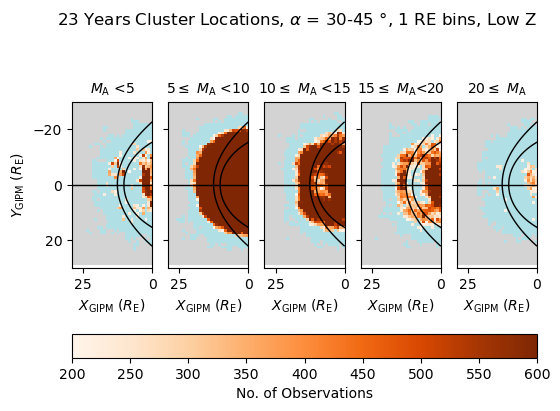

In [100]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle(r'23 Years Cluster Locations, $\alpha$ = 30-45 $\degree$, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_spir_low_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_spir_low_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_spir_low_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_spir_low_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_spir_low_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [101]:
###LOW SPIRAL
###BELOW 5MA

x_locs_spir_high_less5 = df_spir_high_less5['GIPM X (RE)'].to_numpy()
y_locs_spir_high_less5 = df_spir_high_less5['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_less5, xedg, yedg = np.histogram2d(x_locs_spir_high_less5, y_locs_spir_high_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_high_less5 = HistXY_spir_high_less5.T

###5-10 MA

x_locs_spir_high_5_10 = df_spir_high_5_10['GIPM X (RE)'].to_numpy()
y_locs_spir_high_5_10 = df_spir_high_5_10['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_5_10, xedg, zedg = np.histogram2d(x_locs_spir_high_5_10, y_locs_spir_high_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_high_5_10 = HistXY_spir_high_5_10.T

###10-15MA

x_locs_spir_high_10_15 = df_spir_high_10_15['GIPM X (RE)'].to_numpy()
y_locs_spir_high_10_15 = df_spir_high_10_15['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_10_15, xedg, yedg = np.histogram2d(x_locs_spir_high_10_15, y_locs_spir_high_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_high_10_15 = HistXY_spir_high_10_15.T

###15-20MA
x_locs_spir_high_15_20 = df_spir_high_15_20['GIPM X (RE)'].to_numpy()
y_locs_spir_high_15_20 = df_spir_high_15_20['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_15_20, xedg, zedg = np.histogram2d(x_locs_spir_high_15_20, y_locs_spir_high_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_spir_high_15_20 = HistXY_spir_high_15_20.T

###OVER 20MA
x_locs_spir_high_20more = df_spir_high_20more['GIPM X (RE)'].to_numpy()
y_locs_spir_high_20more = df_spir_high_20more['GIPM Y (RE)'].to_numpy()

HistXY_spir_high_20more, xedg, yedg = np.histogram2d(x_locs_spir_high_20more, y_locs_spir_high_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_high_20more = HistXY_spir_high_20more.T

HistXY_spir_high_less5[HistXY_spir_high_less5 == 0] = np.nan
HistXY_spir_high_5_10[HistXY_spir_high_5_10 == 0] = np.nan
HistXY_spir_high_10_15[HistXY_spir_high_10_15 == 0] = np.nan
HistXY_spir_high_15_20[HistXY_spir_high_15_20 == 0] = np.nan
HistXY_spir_high_20more[HistXY_spir_high_20more == 0] = np.nan

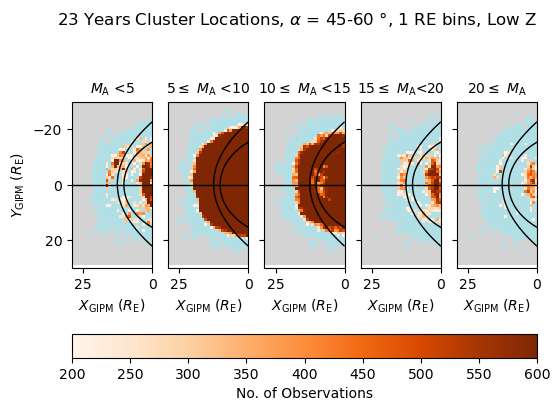

In [102]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle(r'23 Years Cluster Locations, $\alpha$ = 45-60 $\degree$, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_spir_high_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_spir_high_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_spir_high_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_spir_high_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_spir_high_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [108]:
df_perpendicular_low = cl_all.loc[(cl_all['cone angle'] >= 60) & (cl_all['cone angle'] < 75) & (cl_all['GIPM X (RE)'].notnull())]
df_perpendicular_high = cl_all.loc[(cl_all['cone angle'] >= 75) & (cl_all['cone angle'] < 90) & (cl_all['GIPM X (RE)'].notnull())]

df_perp_low_lowZ = df_perpendicular_low.loc[(df_perpendicular_low['GIPM Z (RE)'] < 5) & (df_perpendicular_low['GIPM Z (RE)'] > -5)]
df_perp_high_lowZ = df_perpendicular_high.loc[(df_perpendicular_high['GIPM Z (RE)'] < 5) & (df_perpendicular_high['GIPM Z (RE)'] > -5)]

#perpendicular 

df_perp_low_less5 = df_perp_low_lowZ.loc[(df_perp_low_lowZ['MA'] < 5)]
df_perp_low_5_10 = df_perp_low_lowZ.loc[((df_perp_low_lowZ['MA'] >= 5) & df_perp_low_lowZ['MA'] < 10)]
df_perp_low_10_15 = df_perp_low_lowZ.loc[(df_perp_low_lowZ['MA'] >= 10) & (df_perp_low_lowZ['MA'] < 15)]
df_perp_low_15_20 = df_perp_low_lowZ.loc[(df_perp_low_lowZ['MA'] >= 15) & (df_perp_low_lowZ['MA'] < 20)]
df_perp_low_20more = df_perp_low_lowZ.loc[(df_perp_low_lowZ['MA'] >= 20)]

#high

df_perp_high_less5 = df_perp_high_lowZ.loc[(df_perp_high_lowZ['MA'] < 5)]
df_perp_high_5_10 = df_perp_high_lowZ.loc[((df_perp_high_lowZ['MA'] >= 5) & df_perp_high_lowZ['MA'] < 10)]
df_perp_high_10_15 = df_perp_high_lowZ.loc[(df_perp_high_lowZ['MA'] >= 10) & (df_perp_high_lowZ['MA'] < 15)]
df_perp_high_15_20 = df_perp_high_lowZ.loc[(df_perp_high_lowZ['MA'] >= 15) & (df_perp_high_lowZ['MA'] < 20)]
df_perp_high_20more = df_perp_high_lowZ.loc[(df_perp_high_lowZ['MA'] >= 20)]


In [109]:
###LOW perp
###BELOW 5MA

x_locs_perp_low_less5 = df_perp_low_less5['GIPM X (RE)'].to_numpy()
y_locs_perp_low_less5 = df_perp_low_less5['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_less5, xedg, yedg = np.histogram2d(x_locs_perp_low_less5, y_locs_perp_low_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_low_less5 = HistXY_perp_low_less5.T

###5-10 MA

x_locs_perp_low_5_10 = df_perp_low_5_10['GIPM X (RE)'].to_numpy()
y_locs_perp_low_5_10 = df_perp_low_5_10['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_5_10, xedg, zedg = np.histogram2d(x_locs_perp_low_5_10, y_locs_perp_low_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_low_5_10 = HistXY_perp_low_5_10.T

###10-15MA

x_locs_perp_low_10_15 = df_perp_low_10_15['GIPM X (RE)'].to_numpy()
y_locs_perp_low_10_15 = df_perp_low_10_15['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_10_15, xedg, yedg = np.histogram2d(x_locs_perp_low_10_15, y_locs_perp_low_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_low_10_15 = HistXY_perp_low_10_15.T

###15-20MA
x_locs_perp_low_15_20 = df_perp_low_15_20['GIPM X (RE)'].to_numpy()
y_locs_perp_low_15_20 = df_perp_low_15_20['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_15_20, xedg, zedg = np.histogram2d(x_locs_perp_low_15_20, y_locs_perp_low_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_perp_low_15_20 = HistXY_perp_low_15_20.T

###OVER 20MA
x_locs_perp_low_20more = df_perp_low_20more['GIPM X (RE)'].to_numpy()
y_locs_perp_low_20more = df_perp_low_20more['GIPM Y (RE)'].to_numpy()

HistXY_perp_low_20more, xedg, yedg = np.histogram2d(x_locs_perp_low_20more, y_locs_perp_low_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_low_20more = HistXY_perp_low_20more.T

HistXY_perp_low_less5[HistXY_perp_low_less5 == 0] = np.nan
HistXY_perp_low_5_10[HistXY_perp_low_5_10 == 0] = np.nan
HistXY_perp_low_10_15[HistXY_perp_low_10_15 == 0] = np.nan
HistXY_perp_low_15_20[HistXY_perp_low_15_20 == 0] = np.nan
HistXY_perp_low_20more[HistXY_perp_low_20more == 0] = np.nan

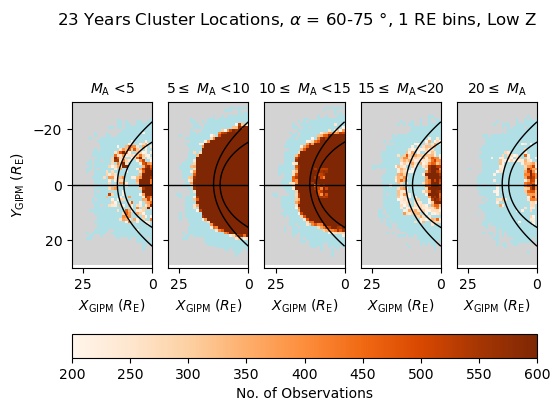

In [110]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle(r'23 Years Cluster Locations, $\alpha$ = 60-75 $\degree$, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_perp_low_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_perp_low_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_perp_low_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_perp_low_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_perp_low_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()


In [111]:
###High perp
###BELOW 5MA

x_locs_perp_high_less5 = df_perp_high_less5['GIPM X (RE)'].to_numpy()
y_locs_perp_high_less5 = df_perp_high_less5['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_less5, xedg, yedg = np.histogram2d(x_locs_perp_high_less5, y_locs_perp_high_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_high_less5 = HistXY_perp_high_less5.T

###5-10 MA

x_locs_perp_high_5_10 = df_perp_high_5_10['GIPM X (RE)'].to_numpy()
y_locs_perp_high_5_10 = df_perp_high_5_10['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_5_10, xedg, zedg = np.histogram2d(x_locs_perp_high_5_10, y_locs_perp_high_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_high_5_10 = HistXY_perp_high_5_10.T

###10-15MA

x_locs_perp_high_10_15 = df_perp_high_10_15['GIPM X (RE)'].to_numpy()
y_locs_perp_high_10_15 = df_perp_high_10_15['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_10_15, xedg, yedg = np.histogram2d(x_locs_perp_high_10_15, y_locs_perp_high_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_high_10_15 = HistXY_perp_high_10_15.T

###15-20MA
x_locs_perp_high_15_20 = df_perp_high_15_20['GIPM X (RE)'].to_numpy()
y_locs_perp_high_15_20 = df_perp_high_15_20['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_15_20, xedg, zedg = np.histogram2d(x_locs_perp_high_15_20, y_locs_perp_high_15_20, bins=[x_bin_edges, z_bin_edges])
HistXY_perp_high_15_20 = HistXY_perp_high_15_20.T

###OVER 20MA
x_locs_perp_high_20more = df_perp_high_20more['GIPM X (RE)'].to_numpy()
y_locs_perp_high_20more = df_perp_high_20more['GIPM Y (RE)'].to_numpy()

HistXY_perp_high_20more, xedg, yedg = np.histogram2d(x_locs_perp_high_20more, y_locs_perp_high_20more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_high_20more = HistXY_perp_high_20more.T

HistXY_perp_high_less5[HistXY_perp_high_less5 == 0] = np.nan
HistXY_perp_high_5_10[HistXY_perp_high_5_10 == 0] = np.nan
HistXY_perp_high_10_15[HistXY_perp_high_10_15 == 0] = np.nan
HistXY_perp_high_15_20[HistXY_perp_high_15_20 == 0] = np.nan
HistXY_perp_high_20more[HistXY_perp_high_20more == 0] = np.nan

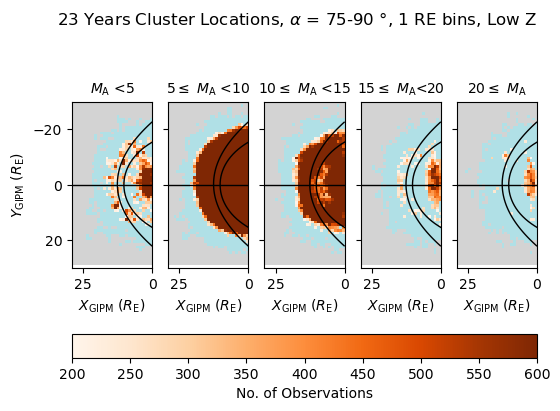

In [113]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=True)
subfigs.suptitle(r'23 Years Cluster Locations, $\alpha$ = 75-90 $\degree$, 1 RE bins, Low Z')

ax0 = axsLeft[0]

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$M_\mathrm{A}$ <5', fontsize=10)

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
#y_s = 0
#x_e = 29

#y_e = -x_e*(tan_angle)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')
im = ax0.imshow(np.flipud(HistXY_perp_high_less5), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin = 200, vmax=600, cmap = cmap)
#ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
ax0.set_ylim(-30,30)
#ax.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.1, ax=axsLeft, label='No. of Observations')

ax1 = axsLeft[1]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'5$\leq$ $M_\mathrm{A}$ <10', fontsize=10)

ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(np.flipud(HistXY_perp_high_5_10), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax1.set_ylim(-30,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_title(r'10$\leq$ $M_\mathrm{A}$ <15', fontsize=10)
#ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(np.flipud(HistXY_perp_high_10_15), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax2.set_ylim(-30,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')
ax3.set_aspect('equal')
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_title(r'15$\leq$ $M_\mathrm{A}$<20', fontsize=10)
ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(np.flipud(HistXY_perp_high_15_20), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax3.set_ylim(-30,30)
ax3.invert_xaxis()
ax3.invert_yaxis()

ax4 = axsLeft[4]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')
ax4.set_aspect('equal')
ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax4.set_title(r'20$\leq$ $M_\mathrm{A}$', fontsize=10)
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(np.flipud(HistXY_perp_high_20more), interpolation='nearest', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin = 200, vmax=600, cmap = cmap)
ax4.set_ylim(-30,30)
ax4.invert_xaxis()
ax4.invert_yaxis()
